In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
class Bot:

    user_dict = {}

    def __init__(self, name, birth_year, df_path='https://raw.githubusercontent.com/fangjin/python_summer_example/main/clustering-2/FIFA.csv'):
        self.name = name
        self.birth_year = birth_year
        self.test_score = 1
        if df_path[-3:] == 'csv':
            self.df = pd.read_csv(df_path)
        elif df_path[-3:] == 'txt':
            self.df = pd.read_csv(df_path, sep = '\t')
        self.df = self.df[['home_score', 'home_xg', 'home_penalty', 'away_score', 'away_xg']].astype(dtype=float)
        self.df.head()
        

    def greet(self):
        print(f'Hello! My name is {self.name}.')
        print(f'I was created in {self.birth_year}.')

    def remind_name(self):
        print('Please, remind me your name.')
        self.name = input()
        print(f'What a great name you have, {self.name}!')
        
    def guess_age(self):
        print('Let me guess your age.')
        print('Enter remainders of dividing your age by 3, 5 and 7.')

        rem3 = int(input())
        rem5 = int(input())
        rem7 = int(input())
        age = (rem3 * 70 + rem5 * 21 + rem7 * 15) % 105

        print(f"Your age is {age}; that's a good time to start programming!")

    def count(self):
        print('Now I will prove to you that I can count to any number you want.')

        num = int(input())
        curr = 0
        while curr <= num:
            print(curr, '!')
            curr = curr + 1

    def test(self):

        print("Let's test your programming knowledge.")
        print("Why do we use methods?")
        print("1. To repeat a statement multiple times.")
        print("2. To decompose a program into several small subroutines.")
        print("3. To determine the execution time of a program.")
        print("4. To interrupt the execution of a program.")
        while True:
            
            answer = int(input())
            if answer == 2:
              Bot.user_dict[self.name] = self.test_score
              break
            else:
                print("Please, try again.")
                self.test_score = self.test_score - 0.1

        print('Completed, have a nice day!')

    def graph_chat(self):
        
        plt.plot([keys for keys in Bot.user_dict.keys()], [values for values in Bot.user_dict.values()])
        plt.show()

    def end(self):
        print('End of chat bot section\n Beginning of Data Bot\n')

    def data_description(self):
        print(f"there are {self.df.shape[0]} rows and {self.df.shape[1]} columns in the dataset")
        print(f"the columns are \n{self.df.columns}")
        print(f"the data types are \n{self.df.dtypes}")
        print(f"the data has {self.df.isnull().sum().sum()} null values")

    def graph_data(self):
        for col in self.df.columns:
            plt.hist(self.df[col])
            plt.title(col)
            plt.show()


    def clustering(self, n_clusters=3):
        self.df = self.df[["home_xg", "away_xg"]]
        self.df.dropna(inplace=True)
        print(self.df.head())
        # plot
        X = self.df.to_numpy()
        plt.scatter(
        X[:, 0], X[:, 1],
        c='white', marker='o',
        edgecolor='black', s=50
        )
        plt.show()
        km = KMeans(
            n_clusters=3, init='random',
            n_init=10, max_iter=300, 
            tol=1e-04, random_state=0
        )
        y_km = km.fit_predict(X)

        # plot the clusters
        plt.scatter(
            X[y_km == 0, 0], X[y_km == 0, 1],
            s=50, c='lightgreen',
            marker='s', edgecolor='black',
            label='cluster 1'
        )
        plt.scatter(
            X[y_km == 1, 0], X[y_km == 1, 1],
            s=50, c='orange',
            marker='o', edgecolor='black',
            label='cluster 2'
        )

        plt.scatter(
            X[y_km == 2, 0], X[y_km == 2, 1],
            s=50, c='lightblue',
            marker='v', edgecolor='black',
            label='cluster 3'
        )

        # plot the centroids
        plt.scatter(
            km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
            s=250, marker='*',
            c='red', edgecolor='black',
            label='centroids'
        )
        plt.legend(scatterpoints=1)
        plt.grid()
        plt.show()



    def run(self):
        self.greet()
        self.remind_name()
        self.guess_age()
        self.count()
        self.test()
        self.graph_chat()
        self.end()
        self.data_description()
        self.graph_data()
        self.clustering()
        

there are 900 rows and 5 columns in the dataset
the columns are 
Index(['home_score', 'home_xg', 'home_penalty', 'away_score', 'away_xg'], dtype='object')
the data types are 
home_score      float64
home_xg         float64
home_penalty    float64
away_score      float64
away_xg         float64
dtype: object
the data has 2542 null values


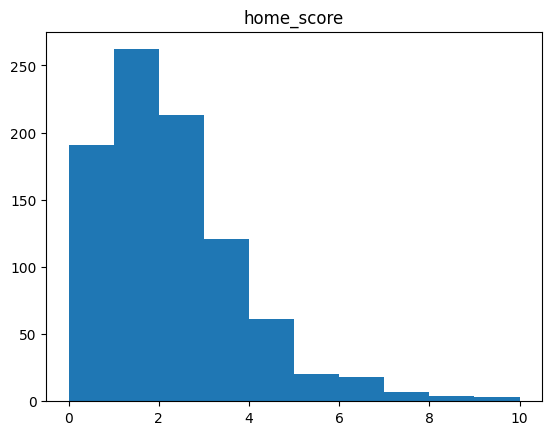

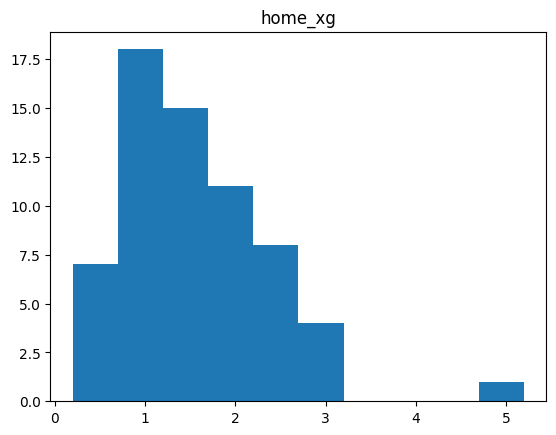

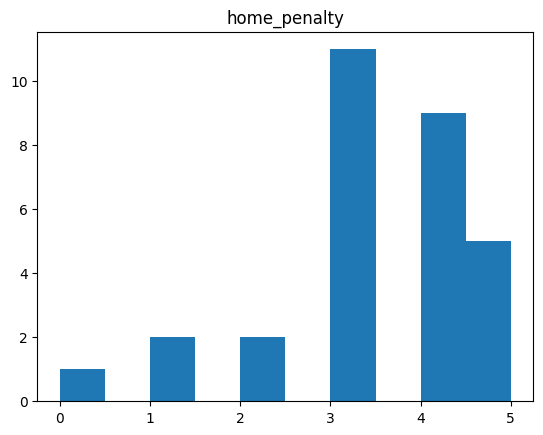

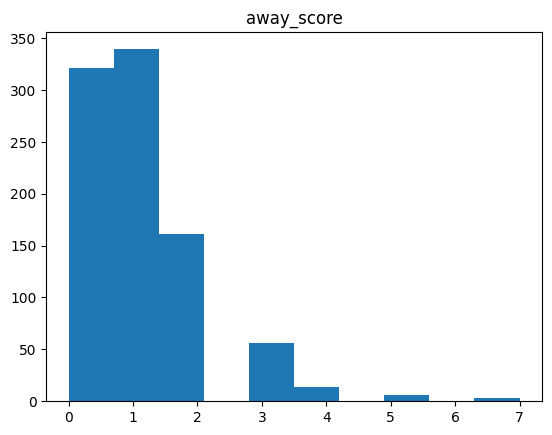

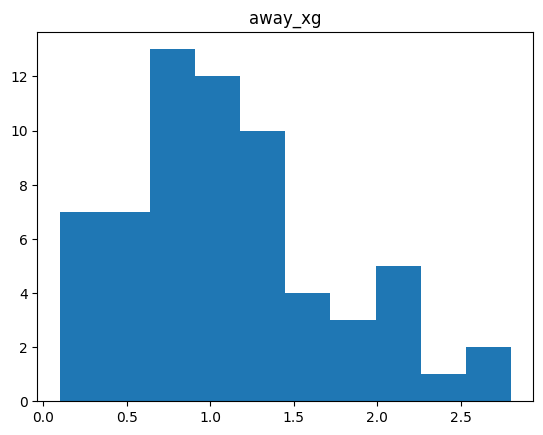

   home_xg  away_xg
0      1.1      1.1
1      1.5      1.0
2      1.7      0.6
3      1.7      0.4
4      0.5      1.0


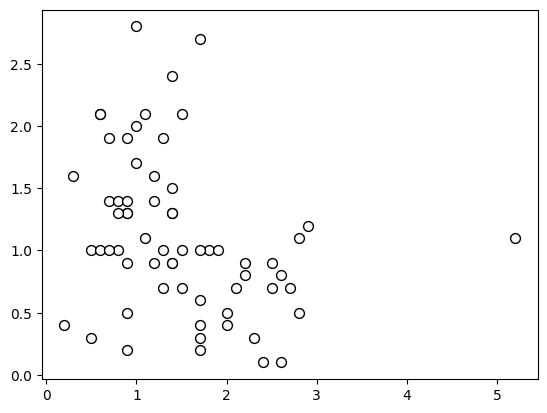

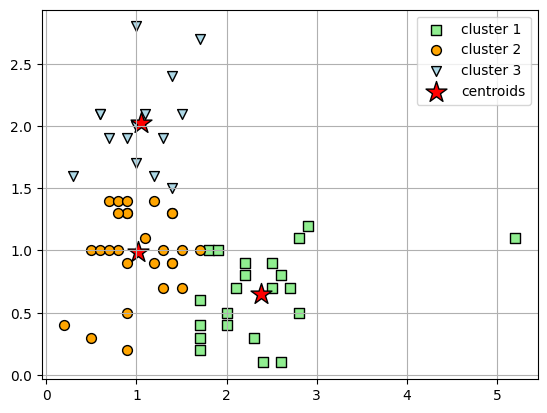

In [3]:
Bot('Jarvis', 2020).run()

In [4]:
"https://raw.githubusercontent.com/fangjin/python_summer_example/main/Clustering-dataset/Clustering1.txt"[-3:]

'txt'

# Example to read `.txt` files using `pandas`

In [5]:
df=pd.read_csv(r"https://raw.githubusercontent.com/fangjin/python_summer_example/main/Clustering-dataset/Clustering1.txt", sep='\t')
df.head()

,Column1,Column2,Unnamed: 2
0,15.55,28.65,NaN
1,14.90,27.55,NaN
2,14.45,28.35,NaN
3,14.15,28.80,NaN
4,13.75,28.05,NaN


# Example to read `excel` files using `pandas`

In [ ]:
excel_data_df = pd.read_excel('records.xlsx', sheet_name='Employees')